In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#Tutorial Video
It is recommended that you watch this YouTube video along with this document.

[Making a TensorFlow Lite Model 2024]() - YouTube


#Software Updates
This Notebook will be updated regularly when bugs are found or software dependancies update.

* version 2.0 - Dec. 16, 2023
  - Update for CENTERSTAGE
    - Major Update: Google Colab upgraded to Python 3.10 and has made previous software incompatibilities. We now create a virtual environment for Python 3.9 to run the old software until it is allowed to run on 3.10
    - New tutorial video posted on Youtube and link is updated
* version 1.1.2 - Feb. 6, 2023
  - added note that you need to click "Save" in CVAT before exporting
* version 1.1.1 - Jan. 19, 2023
  - added notes about how to update the Robot Controller App yourself if your team is using Android Studio to program
* version 1.1 - Jan. 6, 2023
  - added photo capture to notebook for testing your model
  - made changes to allow testing the model after a disconnection from the notebook
* version 1.0 - Jan. 5, 2023
  - made publicly available

#FIRST Tech Cahllenge

The FIRST Tech Challenge game contains elements that can only be completed if your robot can visually detect specific objects in the field.

For the 2023-2024 season, teams can earn points for identifying the Randomization Object on the randomly selected Spike Mark. Earn points by:

  * Placing a purple Pixel On the randomly selected Spike Mark.

  * Placing a yellow Pixel On their Alliance Backdrop in the location corresponding to the randomly
selected Spike Mark.

Additional points are earned for these tasks when a Team uses their Team Prop in place of the
tournament provided white Pixel.

Learn more in the [Game Manual part 2](https://firstinspiresst01.blob.core.windows.net/first-in-show-ftc/game-manual-part-2-traditional.pdf).

##What is Tensor Flow?

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.


> [Wikipedia](https://en.wikipedia.org/wiki/TensorFlow)



##What is Google Colab?

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!
> \-Google

#TensorFlow Lite Model Maker
The TensorFlow Lite Model Maker library simplifies the process of training a TensorFlow Lite model using custom dataset. It uses transfer learning to reduce the amount of training data required and shorten the training time.

This Google Colab Notebook was created using information from many different sources. Please see the [acknowledgements below](#scrollTo=Y0EoYQJ10kxj).

---

For all tasks in this notebook, you should read about what the code does and follow any instructions given above a block of code. You can run the code just by clicking the play button in the top left of a code section. Please ensure that you go through this notebook in order.

---

**If you disconnect from this notebook while completing any one step, you may need to completely restart because Colab does not save all the results of running code between sessions.**

## Prerequisites


###Record a Video

It may be helpful to read about TensorFlow on the [FTCDocs website](https://ftc-docs.firstinspires.org/en/latest/programming_resources/vision/tensorflow_cs_2023/tensorflow-cs-2023.html)
<br><br>
You **need to read** the FTCDocs about [selecting your team prop](https://ftc-docs.firstinspires.org/en/latest/programming_resources/vision/tensorflow_cs_2023/tensorflow-cs-2023.html#selecting-objects-for-the-team-prop).
<br><br>
**Make sure you record your team prop at different angles and with objects of the same color that are not your team prop**
<br><br>
Depending on your framerate, a 40 second video at 24fps makes around 1000 photos. This should be enough to train your model.

**Video needs to be in one of the following formats: mp4, mkv, 3gp, avi, m4v, mov, webm**

### Annotation Setup

In order to train, a human needs to analize each frame of the video and label it with the object(s) we would like the computer to learn how to detect. This process is called annotation and is the majority of the work for the human. Most of the rest of this process will be done by the computer. This is the real teaching in this process.

1. Go to [Kili-Technology](https://www.kili-technology.com) and create a free account.
  * *This free account has a limit of 5000 annotations. You shouldn't need more than that for this project.*
1. Create a project
  * Give your project a name
  * Select "Video" as your "Asset type"
  * Click the "Continue" button in the top right of the webpage
1. Upload files
  * Drag & Drop or click to upload your training video
  * Keep the native frame rate
  * Annotate as a video
  * Click the "Continue" button in the top right of the webpage
1. Edit Interface
  * This is where you will add the labels you will be drawing on each frame of your video
  * Click "+ New Labeling Job"
  * Select "Object Detection - Bounding Box"
  * You can skip the "Write labeling instructions"
  * Type out the categories you will use to label the objects you want to detect.
    * Example: White Pixel
    * Example: Team Prop
1. Add Members
  * There is no need to change anything for this step. Your single account on this site is good enough to finish this task.
  * Click "Finish" button in the top right of the webpage

### Make annotations

Now, open your project. It is time to begin annotating your video!

1. Open project
1. Select the "Bounding Box" tool

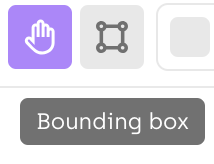

1. Draw a box around the object you want to label
1. Select the label you created earlier
1. Continue labeling your object(s) in all frames of the video.
  * You can use the arrow keys on your keyboard to advance and rewind frames of the video.
  * **You don't need to label every single frame.** You should use the propgation tool or drag to extend the labels use in the timeline at the bottom of the screen.
    * This will interpolate between all the frames that you do move/adjust the bounding box. You can get away with moving the bounding box every 10 frames or so. It depends on how much the object in the video is moving.
    
  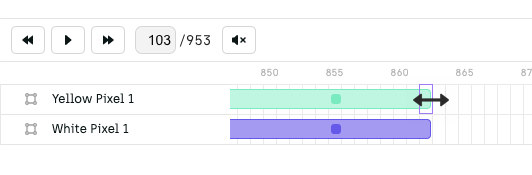
  
1. Click the "submit" button in the top right of the screen when you are done.

### Export Annotations

1. Open the "..." menu near the top right of the screen and select "Export all labels"

  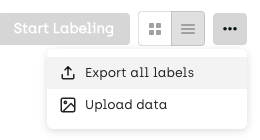
2. Select **Pascal VOC** for the label format and you can leave all the other options alone.
  * This is the only format available that is compatible with TensorFlow Model Maker. The other formats will not work in the rest of this notebook.
3. Click "Export".
  * This can take a minute or two because it is exporting the labels and turning the video into still images for you.
4. Click the notification bell in the top right corner of the screen.
5. Click the download button to download your annotations and images.

###Mount your Google Drive for storage and make a directory for this project

In [ ]:
#@markdown You will be asked to authorize the connection to your Google Drive. This Colab Notebook will only create files and will not delete them.
#@markdown <br><br>Please make sure you have at least 1 GB of storage as images created during this process can take up a lot of space.
#@markdown <br><br>**Please name your project folder below**
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

PROJECT_FOLDER = "TensorFlow2024" #@param {type:"string"}
%cd /content/drive/MyDrive/
%mkdir -p $PROJECT_FOLDER

PATH = "/content/drive/MyDrive/"+PROJECT_FOLDER


####Upload Annotations and Images To Google Drive

* Unzip the file you downloaded from Kili
* Upload all the files and folders to your project folder *(TensorFlow2024 by default)* in your Google Drive

You should have a similar folder structure in Google Drive
* MyDrive
  * TensorFlow2024 (Project Name)
    * README.kili.txt
    * video_meta.json
    * images (folder)
    * labels (folder)

##Setup Virtual Python 3.9 Environment

Due to Google Colab's Python environment being updated to Python 3.10, the TensorFlow Model Maker no longer works. They are actively working on fixing the issue. Until then, we have to make a virtual environment of Python 3.9 in order to train our object detection model.

In [ ]:
%env PYTHONPATH = # /env/python

While installing this software, **you will need to type y** and then click enter into the output box below to agree to the software installation.

In [ ]:
# Download and install and update miniconda
!wget https://repo.anaconda.com/miniconda/Miniconda3-py39_23.3.1-0-Linux-x86_64.sh
!chmod +x Miniconda3-py39_23.3.1-0-Linux-x86_64.sh
!./Miniconda3-py39_23.3.1-0-Linux-x86_64.sh -b -f -p /usr/local
!conda update -q conda

Add Python 3.9 to the environment.

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.9/site-packages')

While starting the virtual environment, **you will need to type y** and click enter into the output box to agree to the software installation.

In [ ]:
# create conda environment
!conda create -n myenv python=3.9

Add the script that will train our object detection model. This will be what is run in virtual environment. Feel free to view this script on [Github](https://github.com/kylejramstad/TFLiteModelMakerColab/blob/main/train.py).

In [ ]:
!wget -O /content/train.py https://raw.githubusercontent.com/kylejramstad/TFLiteModelMakerColab/main/train.py

Now we will install all the software needed for creating our object detection model in our new Python 3.9 environment.

**You will need to type y** and click enter into the output box to agree to the software installation.

In [ ]:
%%shell
eval "$(conda shell.bash hook)"
conda activate myenv
pip install -q tflite-model-maker
pip install -q tflite-support-nightly
pip3 install -q pycocotools
pip install -q ipykernel
pip install -q numpy==1.23.4
pip install -q ipykernel
conda install ipykernel
python -m ipykernel install --user

This will create all the folders we need during the training process. This will remove any old folders that should not be in your data.

In [ ]:
%rm -r $PATH/training
%rm -r $PATH/validation
%rm -r $PATH/testing

%mkdir -p $PATH/training
%mkdir -p $PATH/training/images
%mkdir -p $PATH/training/Annotations
%mkdir -p $PATH/validation/images
%mkdir -p $PATH/validation/Annotations
%mkdir -p $PATH/testing/images
%mkdir -p $PATH/testing/Annotations

##Train Object Detection Model
Now we can start training our object detection model.

But first we have some options to select below.

###Image Downsize

During the training process, your image and label data will be resized to reduce the time it takes to train the model.

In [ ]:
#@markdown *Don't forget to run this code to set these sizes*
newX = 240 #@param {type:"number"}
newY = 240 #@param {type:"number"}

###Model Architecture

EfficientDet-Lite[0-4] are a family of mobile/IoT-friendly object detection models derived from the [EfficientDet](https://arxiv.org/abs/1911.09070) architecture.

Creating a machine learning model from scratch is a very long process that can be very difficult to do. The TFLite Model Maker software allows you to build on top of a previously made model to reduce the time it takes to make a new one.

Here is the performance of each EfficientDet-Lite models compared to each other. The default is EfficientDet-Lite0 as it is the fastest when it runs on your robot controller. If it is not accurate enough, you should try and move down the list.

| Model architecture | Size(MB)* | Latency(ms)** | Average Precision*** |
|--------------------|-----------|---------------|----------------------|
| EfficientDet-Lite0 | 4.4       | 37            | 25.69%               |
| EfficientDet-Lite1 | 5.8       | 49            | 30.55%               |
| EfficientDet-Lite2 | 7.2       | 69            | 33.97%               |
| EfficientDet-Lite3 | 11.4      | 116           | 37.70%               |
| EfficientDet-Lite4 | 19.9      | 260           | 41.96%               |

<i> * Size of the integer quantized models. <br/>
** Latency measured on the Pixel 4 Phone using 4 threads on CPU. <br/>
*** Average Precision is the mAP (mean Average Precision) on the COCO 2017 validation dataset.
</i>


In [ ]:
#@markdown Select your object detection model archiecture from the dropdown menu. <br><br> Run this code block to set the modelType.
modelType = "efficientdet-lite0" #@param ["efficientdet-lite0","efficientdet-lite1","efficientdet-lite2","efficientdet-lite3","efficientdet-lite4"]

###Train the Model

**This step may take some time**

Here are some notes about what will happen:
* Your dataset of images and labels will be split into 3 different groups:

  * Training (80%): These images are used to train the object detection model to recognize your cone sleeve images.

  * Validation (10%): These are images that the model didn't see during the training process but will use them to decide when you should stop the training, to avoid [overfitting](https://en.wikipedia.org/wiki/Overfitting).
  
  * Test (10%): These images are used to evaluate the final model performance.

* TensorFlow Model Maker will train your object detection model.
  * While the model is training you will see the word "Epoch". Your training will go through 50 epochs. In otherwords, it will go through the training dataset 50 times.
  * You may see "batch_size". This is the number of images that will be trained with at a time. Your training will use a batch_size of 8.

* After training, it will evaluate your model on the test dataset described above. It will print out the results of the evealuation.
  * Read about the [model metrics](https://ftc-docs.firstinspires.org/ftc_ml/managing_tool/model_metrics/model-metrics.html) from FTC Docs.

* We will then export your object detection model to your project folder and evaluate the model one more time. The evaluation results after exporting can be slightly different due to the exporting process.


This prepares the settings you already picked for the project folder, image resize dimensions, and model architecture type.

In [ ]:
%env PROJECT_FOLDER = $PROJECT_FOLDER
%env newX = $newX
%env newY = $newY
%env modelType = $modelType

This code will now create your object detection model by running the training script. If you want to read through the script to see how it works, open the [file on Github](https://github.com/kylejramstad/TFLiteModelMakerColab/blob/main/train.py).

In [ ]:
%%shell
eval "$(conda shell.bash hook)"
conda activate myenv
python /content/train.py /content/drive/MyDrive/$PROJECT_FOLDER $newX $newY $modelType

#Testing Your Model
This section will allow you to test TFLite object detection models only. You do not need to have created the model with the steps above and it will still test it.

##Upload your model
* Upload the model you would like to test. It should be a .tflite file.
* Upload the labels file that matches the model. It should be called labels.txt and was saved to the same folder as you model when it was created.

In [ ]:
from google.colab import files
uploaded = files.upload()

## Load TFLite Model Evaluation Functions

In [ ]:
#@markdown Run this code to load your TFLite model and all the functions needed to detect your objects.
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')

model_path = '/content/model.tflite'
labels_path = '/content/labels.txt'

# Load the labels into a list
file = open(labels_path, "r")
file_data = file.read()
classes = file_data.split("\n")
file.close()

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes)+1, 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(images=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

##Take a test picture

In [ ]:
#@markdown Run this code to take a picture
#@markdown <br>*It is a good idea to take this ppicture in a smilar setting as your robot would see it during a match*

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='/tmp/image.png', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({audio: false,video: { width: 320, height: 180 }});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/png', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

##Test the picture

In [ ]:
#@markdown Select your detection threshold and then run the code to test your model on the picture to took.
from PIL import Image

DETECTION_THRESHOLD = 0.10 #@param {type:"number"}

TEMP_FILE = '/tmp/image.png'

im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)

## Testing outside of Google Colab

If you want to test your model faster, you will need to be able to run python code on your computer. This will vary between different operating systems. Please follow this guide to help you install python on your computer.

https://realpython.com/installing-python/

Once you have python installed on your computer, you can use the Model Tester program here on Github.

https://github.com/kylejramstad/FTC-TFLite-Model-Maker/tree/main

This testing program will allow you to run your object detection model in real time without using your robot controller and without having to write any code for your robot.

Please make sure you follow the instruction on the Github page.

#Using your TensorFlow Lite Model


##Robot Controller App

Because the TensorFlow Lite Model Maker is a newer technology, the Robot Controller App that runs on your Rev Control Hub will not properly load your new tflite model unless it is up to date.

**If you are coding using Android Studio, you need to ensure your Android Studio project was started with the current version of the app from [Github](https://github.com/FIRST-Tech-Challenge/FtcRobotController)**.

Otherwise, follow the download and update instructions below.

###Download and Update APK

Download the updated Robot Controller App here:
* https://github.com/FIRST-Tech-Challenge/FtcRobotController/releases/download/v9.0.1/FtcRobotController-release.apk

Update your Rev Control Hub's Robot Controller App:
* Connect to your Rev Control Hub's Wifi
* Click on the Manage Button
  * 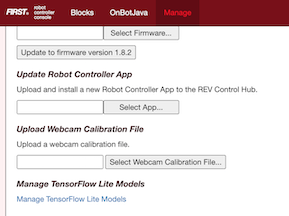
* Scroll down to 'Update Robot Controller App' and select the APK file you downloaded.
* Continue through all warnings and dialoges to install the new Robot Controller App.

* **Note: you need to latest version of the FTC Driver Station App on your Rev Driver Hub as well.**
  * This can be updated on the Rev Driver Hub itself by connecting to Wifi and running the Software Manager App to update it.

##Download Model


You can download the TensorFlow Lite model file from your [Google Drive](https://dirve.google.com). It is in your project folder.

##Load onto Rev Control Hub



* Connect to your Rev Control Hub's Wifi
* Click on the Manage Button
* Scroll down to 'Manage TensorFlow Lite Models' and click the link
* Click upload models and select your **model.tflite** file that you downloaded
  * 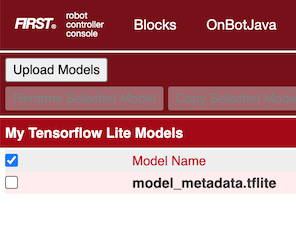

##Coding with your tflite model

FTC Docs has great explanations on how to use and program with your tflite model now that it is loaded onto your Rev Control Hub.
###OnBot Java & Blocks Programming
* [Android Studio / OnBot Java](https://ftc-docs.firstinspires.org/en/latest/programming_resources/vision/java_tfod_opmode_custom/java-tfod-opmode-custom.html)
* [Blocks](https://ftc-docs.firstinspires.org/en/latest/programming_resources/vision/blocks_tfod_opmode_custom/blocks-tfod-opmode-custom.html)

# Acknowledgements and Sources

* Colab Notebook for the [TensorFlow Lite Model Maker Object Detection](https://www.tensorflow.org/lite/models/modify/model_maker/object_detection) library.
* [Danny Diaz](https://www.linkedin.com/in/dannydiaz1) from FIRST for sending me in the right direction
* [George MacKerron](https://github.com/jawj) for finding why newer TensorFlow models don't work with older detectors ([see issue on github](https://github.com/tensorflow/tensorflow/issues/51591#issuecomment-923051299))
* [Tarkket](https://github.com/Tarkkett) for finding the fix for the Robot Controller App ([see issue on Github](https://github.com/FIRST-Tech-Challenge/FtcRobotController/issues/505#issuecomment-1345664948))
* [FTC-Docs](https://ftc-docs.firstinspires.org/programming_resources/vision/tensorflow_pp_2022/tensorflow_pp_2022.html)
* [TensorFlow Metadata Writer of Object Detection](https://www.tensorflow.org/lite/models/convert/metadata_writer_tutorial#object_detectors)
* [The original tutorial for TensorFlow Lite Model Maker for Object Detection](https://www.tensorflow.org/lite/models/modify/model_maker/object_detection)
* dusskapark on [Disscuss TensorFlow](https://discuss.tensorflow.org/t/tflite-model-maker-training-error-custom-object-detection/6696/8) and Wayne Cheng on this [Linked-In Blog Post](https://www.linkedin.com/pulse/solving-out-memory-oom-errors-keras-tensorflow-running-wayne-cheng) for helping me fix Out-Of-Memory errors
* wwfisher on the [Tensorflow Discussion Boards](https://discuss.tensorflow.org/t/running-tflite-model-maker-in-google-colab-june-july-2023/18049) for assisting in how to run last year's code in a virtual environment.